In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Air_Quality.csv')

In [3]:
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [4]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [5]:
df['Message'].nunique()

0

In [6]:
df['Geo Join ID'].value_counts(),df['Geo Place Name'].value_counts()

(Geo Join ID
 203       342
 207       342
 405       342
 401       342
 205       342
          ... 
 404406     92
 306308     92
 305307     92
 501502     92
 309310     92
 Name: count, Length: 72, dtype: int64,
 Geo Place Name
 Bedford Stuyvesant - Crown Heights    242
 West Queens                           242
 Flushing - Clearview                  242
 Upper West Side                       242
 Jamaica                               242
                                      ... 
 Bayside Little Neck-Fresh Meadows      92
 Northern SI                            92
 Upper East Side-Gramercy               92
 Union Square-Lower Manhattan           92
 Chelsea-Village                        92
 Name: count, Length: 114, dtype: int64)

In [7]:
df1 = df.drop(['Message','Unique ID'],axis=1).copy()

In [8]:
df1

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30
1,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93
2,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09
3,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76
4,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83
...,...,...,...,...,...,...,...,...,...,...
16213,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10
16214,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30
16215,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50
16216,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80


In [9]:
df['Indicator ID'].value_counts()

Indicator ID
375    5499
365    5499
386    1974
644     214
643     209
645     209
646     203
647     203
653     192
655     192
659     192
652     192
639     192
651     192
650     192
661     192
657     192
648     192
642      96
640      96
641      96
Name: count, dtype: int64

In [10]:
df.Name.nunique()

18

In [11]:
df['Indicator ID'].nunique()

21

In [12]:
names=df['Name'].value_counts()

In [13]:
indicator_names = {}
for name, Id in df.iterrows():
    name=Id['Name']
    iD =Id['Indicator ID']
    indicator_names[name]=iD
indicator_names

{'Nitrogen dioxide (NO2)': 375,
 'Fine particles (PM 2.5)': 365,
 'Ozone (O3)': 386,
 'Asthma emergency department visits due to PM2.5': 648,
 'Annual vehicle miles traveled': 643,
 'Asthma hospitalizations due to Ozone': 655,
 'Respiratory hospitalizations due to PM2.5 (age 20+)': 650,
 'Boiler Emissions- Total SO2 Emissions': 640,
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)': 651,
 'Boiler Emissions- Total PM2.5 Emissions': 641,
 'Boiler Emissions- Total NOx Emissions': 642,
 'Annual vehicle miles travelled (cars)': 644,
 'Annual vehicle miles travelled (trucks)': 645,
 'Cardiac and respiratory deaths due to Ozone': 652,
 'Asthma emergency departments visits due to Ozone': 659,
 'Outdoor Air Toxics - Formaldehyde': 647,
 'Outdoor Air Toxics - Benzene': 646,
 'Deaths due to PM2.5': 639}

## Since We determine a dictonary for determining the indicators name now we can remove indicator names from data because it's easy for model to work with numerical data rather than a categorical data

In [14]:
df2 = df1.drop('Name', axis='columns').copy()

In [15]:
df2

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30
1,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93
2,375,Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09
3,375,Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76
4,375,Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83
...,...,...,...,...,...,...,...,...,...
16213,647,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10
16214,647,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30
16215,652,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50
16216,652,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80


## Now sorted out indicator names and unwanted columns let's work on the indicators importance in weather and its relevance measurement

In [16]:
def idxn(n):
    try:
        indicator_key = next(key for key, value in indicator_names.items() if value == int(n))
        return indicator_key
    except Exception as e:
        print("no such data")

In [17]:
idxn(647)

'Outdoor Air Toxics - Formaldehyde'

In [18]:
df['Measure Info'].value_counts()

Measure Info
ppb                     7473
mcg/m3                  5499
per 100,000 adults      1152
per km2                  632
per 100,000 children     576
µg/m3                    406
number                   288
per 100,000              192
Name: count, dtype: int64

In [19]:
max(df2['Data Value'])

424.7

In [20]:
df2[df['Data Value'] == 424.7]

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
6116,648,Estimated annual rate (under age 18),"per 100,000 children",UHF42,302,Central Harlem - Morningside Heights,2005-2007,01/01/2005,424.7


In [21]:
min(df2['Data Value'])

0.0

In [22]:
df2[df2['Data Value']==0.0]

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
2332,640,Number per km2,number,UHF42,410,Rockaways,2013,01/01/2013,0.0
4232,640,Number per km2,number,UHF42,503,Willowbrook,2015,01/01/2015,0.0
4790,640,Number per km2,number,UHF42,501,Port Richmond,2015,01/01/2015,0.0
4938,641,Number per km2,number,UHF42,201,Greenpoint,2015,01/01/2015,0.0
5330,640,Number per km2,number,UHF42,501,Port Richmond,2013,01/01/2013,0.0
5746,640,Number per km2,number,UHF42,410,Rockaways,2015,01/01/2015,0.0
5853,640,Number per km2,number,UHF42,208,Canarsie - Flatlands,2013,01/01/2013,0.0
5854,641,Number per km2,number,UHF42,208,Canarsie - Flatlands,2013,01/01/2013,0.0
6023,640,Number per km2,number,UHF42,503,Willowbrook,2013,01/01/2013,0.0
6291,640,Number per km2,number,UHF42,504,South Beach - Tottenville,2015,01/01/2015,0.0


In [23]:
df2[df2['Data Value'] == 0.0].shape

(30, 9)

In [24]:
idxn(640),idxn(641)

('Boiler Emissions- Total SO2 Emissions',
 'Boiler Emissions- Total PM2.5 Emissions')

In [25]:
df2[df2['Measure Info'] == 'number']

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
1625,640,Number per km2,number,UHF42,202,Downtown - Heights - Slope,2015,01/01/2015,1.2
1739,640,Number per km2,number,Borough,4,Queens,2013,01/01/2013,2.2
1752,640,Number per km2,number,UHF42,107,Hunts Point - Mott Haven,2015,01/01/2015,1.7
1778,640,Number per km2,number,UHF42,307,Gramercy Park - Murray Hill,2015,01/01/2015,41.5
1785,640,Number per km2,number,UHF42,206,Borough Park,2015,01/01/2015,1.1
...,...,...,...,...,...,...,...,...,...
15824,640,Number per km2,number,UHF42,211,Williamsburg - Bushwick,2013,01/01/2013,0.3
16060,640,Number per km2,number,UHF42,104,Pelham - Throgs Neck,2015,01/01/2015,2.8
16061,640,Number per km2,number,Borough,5,Staten Island,2015,01/01/2015,0.1
16063,640,Number per km2,number,UHF42,104,Pelham - Throgs Neck,2013,01/01/2013,4.4


## Let's convert µg/m3	into ppb

In [26]:
df2[df2['Measure Info']=='µg/m3']['Measure'].value_counts()

Measure
Annual average concentration    406
Name: count, dtype: int64

In [27]:
df2[df2['Measure Info']=='µg/m3']['Indicator ID'].value_counts()

Indicator ID
647    203
646    203
Name: count, dtype: int64

In [28]:
idxn(647), idxn(646)

('Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene')

## Let's change the microgram/cubic gram to ppb

In [29]:
df_ppb_ben=[]
df_ppb_formal=[]
for idx,value in df2[(df2['Measure Info']=='µg/m3') & (df2['Indicator ID'] == 646)].iterrows():
    data = value['Data Value']
    x = round((24.45 * data)/78.1,2)
    df_ppb_ben.append(x)
for idx, value in df2[(df['Measure Info']=='µg/m3') & (df2['Indicator ID'] == 647)].iterrows():
    data = value['Data Value']
    x = round((24.45 * data)/30.03,2)
    df_ppb_formal.append(x)

In [30]:
df_ppb_ben[:5], df_ppb_formal[:5]

([0.81, 0.44, 0.34, 0.33, 0.33], [1.95, 1.95, 1.55, 1.41, 1.07])

In [31]:
df2[(df2['Measure Info']=='µg/m3') & (df2['Indicator ID'] == 647)]['Data Value']

7577     2.40
7578     2.40
7579     1.90
7580     1.73
7581     1.31
         ... 
16183    1.61
16184    1.61
16185    1.80
16213    3.10
16214    2.30
Name: Data Value, Length: 203, dtype: float64

In [32]:
df[df['Measure Info']=='µg/m3']['Data Value']

7577     2.40
7578     2.40
7579     1.90
7580     1.73
7581     1.31
         ... 
16183    1.61
16184    1.61
16185    1.80
16213    3.10
16214    2.30
Name: Data Value, Length: 406, dtype: float64

In [33]:
df2[df2['Measure Info']=='µg/m3']

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
7577,647,Annual average concentration,µg/m3,UHF42,408,Jamaica,2005,01/01/2005,2.40
7578,647,Annual average concentration,µg/m3,UHF42,407,Southwest Queens,2005,01/01/2005,2.40
7579,647,Annual average concentration,µg/m3,UHF42,407,Southwest Queens,2011,01/01/2011,1.90
7580,647,Annual average concentration,µg/m3,UHF42,107,Hunts Point - Mott Haven,2014,01/01/2014,1.73
7581,647,Annual average concentration,µg/m3,UHF42,407,Southwest Queens,2014,01/01/2014,1.31
...,...,...,...,...,...,...,...,...,...
16183,647,Annual average concentration,µg/m3,UHF42,304,Upper West Side,2014,01/01/2014,1.61
16184,647,Annual average concentration,µg/m3,UHF42,104,Pelham - Throgs Neck,2014,01/01/2014,1.61
16185,647,Annual average concentration,µg/m3,Borough,5,Staten Island,2011,01/01/2011,1.80
16213,647,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10


In [34]:
len(df_ppb_ben)

203

replace the columns

In [35]:
df3 = df2.copy()
pp = ['ppb' for i in range(len(df3.loc[df3['Measure Info'] == 'µg/m3','Measure Info']))]
df3.loc[(df3['Measure Info'] == 'µg/m3') & (df3['Indicator ID']==646), 'Data Value'] = df_ppb_ben
df3.loc[(df3['Measure Info'] == 'µg/m3') & (df3['Indicator ID']==647), 'Data Value'] = df_ppb_formal
df3.loc[df3['Measure Info'] == 'µg/m3','Measure Info'] = pp

In [36]:
df3['Measure Info'].value_counts()

Measure Info
ppb                     7879
mcg/m3                  5499
per 100,000 adults      1152
per km2                  632
per 100,000 children     576
number                   288
per 100,000              192
Name: count, dtype: int64

In [37]:
df3[(df3['Indicator ID']==646) & (df3['Measure Info']=='ppb')]

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
7586,646,Annual average concentration,ppb,UHF42,308,Greenwich Village - SoHo,2011,01/01/2011,0.81
7587,646,Annual average concentration,ppb,UHF42,207,East Flatbush - Flatbush,2011,01/01/2011,0.44
7588,646,Annual average concentration,ppb,Borough,1,Bronx,2011,01/01/2011,0.34
7589,646,Annual average concentration,ppb,UHF42,307,Gramercy Park - Murray Hill,2014,01/01/2014,0.33
7595,646,Annual average concentration,ppb,UHF42,201,Greenpoint,2014,01/01/2014,0.33
...,...,...,...,...,...,...,...,...,...
15806,646,Annual average concentration,ppb,UHF42,304,Upper West Side,2014,01/01/2014,0.30
15807,646,Annual average concentration,ppb,UHF42,204,East New York,2011,01/01/2011,0.44
15808,646,Annual average concentration,ppb,UHF42,104,Pelham - Throgs Neck,2014,01/01/2014,0.31
15809,646,Annual average concentration,ppb,Borough,5,Staten Island,2011,01/01/2011,0.38


In [38]:
df3[df3['Measure Info'] == 'mcg/m3']

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
381,365,Mean,mcg/m3,UHF34,203,Bedford Stuyvesant - Crown Heights,Winter 2009-10,12/01/2009,10.30
382,365,Mean,mcg/m3,UHF34,203,Bedford Stuyvesant - Crown Heights,Summer 2020,06/01/2020,6.98
383,365,Mean,mcg/m3,UHF34,204,East New York,Annual Average 2014,12/01/2013,9.04
384,365,Mean,mcg/m3,UHF34,204,East New York,Winter 2016-17,12/01/2016,8.11
385,365,Mean,mcg/m3,UHF34,103,Fordham - Bronx Pk,Winter 2009-10,12/01/2009,11.40
...,...,...,...,...,...,...,...,...,...
16193,365,Mean,mcg/m3,UHF42,104,Pelham - Throgs Neck,Annual Average 2020,01/01/2020,6.12
16194,365,Mean,mcg/m3,Borough,5,Staten Island,Annual Average 2011,12/01/2010,9.44
16195,365,Mean,mcg/m3,CD,107,Upper West Side (CD7),Winter 2008-09,12/01/2008,14.65
16196,365,Mean,mcg/m3,CD,107,Upper West Side (CD7),Winter 2013-14,12/01/2013,13.77


##  MCG/M3 AND µg/m3 is same so, you think we may convert the mcg/m3 column to ppb but as the indicator is fine particles(PM 2.5) there's no spefic molecular weight to convert so we keep the category as it is


## Now let's see the column GEO type Name

In [39]:
df3['Geo Type Name'].value_counts()

Geo Type Name
UHF42       6300
CD          5900
UHF34       3128
Borough      740
Citywide     150
Name: count, dtype: int64

In [40]:
min(df3['Geo Join ID']),max(df3['Geo Join ID'])

(1, 105106107)

In [41]:
df3.loc[df3['Geo Join ID']==1]

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
64,375,Mean,ppb,Borough,1,Bronx,Annual Average 2014,12/01/2013,19.80
132,375,Mean,ppb,Borough,1,Bronx,Summer 2018,06/01/2018,13.62
133,375,Mean,ppb,Borough,1,Bronx,Summer 2020,06/01/2020,13.16
134,375,Mean,ppb,Borough,1,Bronx,Winter 2009-10,12/01/2009,24.39
135,375,Mean,ppb,Borough,1,Bronx,Summer 2017,06/01/2017,14.97
...,...,...,...,...,...,...,...,...,...
15469,655,Estimated annual rate (under age 18),"per 100,000 children",Citywide,1,New York City,2005-2007,01/01/2005,22.00
15477,652,Estimated annual rate,"per 100,000",Citywide,1,New York City,2009-2011,01/01/2009,4.70
15478,652,Estimated annual rate,"per 100,000",Citywide,1,New York City,2012-2014,01/02/2012,5.00
15479,652,Estimated annual rate,"per 100,000",Citywide,1,New York City,2015-2017,01/01/2015,4.80


In [42]:
df3.loc[df3['Geo Join ID']==max(df3['Geo Join ID'])]

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
207,375,Mean,ppb,UHF34,105106107,South Bronx,Annual Average 2020,01/01/2020,18.59
208,375,Mean,ppb,UHF34,105106107,South Bronx,Winter 2018-19,12/01/2018,23.64
220,375,Mean,ppb,UHF34,105106107,South Bronx,Winter 2016-17,12/01/2016,27.47
221,375,Mean,ppb,UHF34,105106107,South Bronx,Summer 2020,06/01/2020,14.49
222,375,Mean,ppb,UHF34,105106107,South Bronx,Summer 2017,06/01/2017,16.75
...,...,...,...,...,...,...,...,...,...
11793,365,Mean,mcg/m3,UHF34,105106107,South Bronx,Winter 2017-18,12/01/2017,8.65
11794,365,Mean,mcg/m3,UHF34,105106107,South Bronx,Annual Average 2019,01/01/2019,7.33
14207,375,Mean,ppb,UHF34,105106107,South Bronx,Winter 2008-09,12/01/2008,32.11
14208,375,Mean,ppb,UHF34,105106107,South Bronx,Winter 2013-14,12/01/2013,28.11


## Seems like we didn't have anything in Geo Type name and geo join id to deal with if it is then we'll ask our manager about that data relevance as a data scientist or ML engineer our job is to make a model to predict not the intepret the data but sometimes we have to do it

In [43]:
df3['Geo Place Name'].value_counts()

Geo Place Name
Bedford Stuyvesant - Crown Heights    242
West Queens                           242
Flushing - Clearview                  242
Upper West Side                       242
Jamaica                               242
                                     ... 
Bayside Little Neck-Fresh Meadows      92
Northern SI                            92
Upper East Side-Gramercy               92
Union Square-Lower Manhattan           92
Chelsea-Village                        92
Name: count, Length: 114, dtype: int64

In [44]:
df3.loc[df3['Measure']=='Mean','Time Period'].value_counts()

Time Period
Summer 2017                        423
Summer 2011                        423
Summer 2012                        423
Summer 2020                        423
Summer 2016                        423
Summer 2014                        423
Summer 2010                        423
Summer 2018                        423
Summer 2021                        423
Summer 2013                        423
Summer 2009                        423
Summer 2015                        423
Summer 2019                        423
Winter 2020-21                     282
Winter 2015-16                     282
Winter 2019-20                     282
Annual Average 2019                282
Winter 2013-14                     282
Annual Average 2010                282
Winter 2017-18                     282
Winter 2008-09                     282
Winter 2012-13                     282
Annual Average 2011                282
Annual Average 2016                282
Annual Average 2018                282
Annual Averag

In [45]:
df3['Time Period'].value_counts()

Time Period
2012-2014                          480
2005-2007                          480
2009-2011                          480
2015-2017                          480
Summer 2014                        423
Summer 2010                        423
Summer 2012                        423
Summer 2021                        423
Summer 2013                        423
Summer 2011                        423
Summer 2020                        423
Summer 2015                        423
Summer 2019                        423
Summer 2016                        423
Summer 2018                        423
Summer 2017                        423
Summer 2009                        423
2005                               407
2016                               321
Annual Average 2019                282
Winter 2019-20                     282
Annual Average 2010                282
Winter 2015-16                     282
Winter 2020-21                     282
Winter 2012-13                     282
Annual Averag

## We can extract the months from time period to see in which month our data is higher or lower

In [46]:
f = df3['Time Period'].str.split(' ')

In [47]:
f[60][0]

'Summer'

In [48]:
df4= df3.copy()

In [49]:
df4['Time Period'].isnull().sum()

0

In [50]:
# df4['Months Involved'] = None

In [51]:
summer=['Jun', 'Jul','Aug']
winter=['Nov','Dec','Jan','Feb','Mar','Apr']
annual=['Jan','Feb','Mar','Apr', 'May','Jun', 'Jul','Aug','Sep','Nov','Dec']

for idx, value in df4.iterrows():
    val = value['Time Period']
    if val.startswith(('Summer','2-Year')):
        df4.loc[idx, 'Months Involved'] = 'summer'
    elif val.startswith('Winter'):
        df4.loc[idx, 'Months Involved'] = 'winter'
    #we can conclude these 3 elifs into one but for code beauty we split them by their similarities
    elif val.startswith('Annual'):
        df4.loc[idx, 'Months Involved'] = 'annual'
    elif val.startswith(('2012-2014', '2005-2007', '2009-2011', '2015-2017')):
        df4.loc[idx, 'Months Involved'] = 'annual'
    elif val.startswith(('2011', '2013', '2014', '2015', '2005', '2016')):
        df4.loc[idx, 'Months Involved'] = 'annual'
#Now it's time to replace them with our desired value


In [52]:
df4[df4['Months Involved'] =='summer'].head(3)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Months Involved
14,375,Mean,ppb,UHF42,209,Bensonhurst - Bay Ridge,Summer 2009,06/01/2009,18.95,summer
15,375,Mean,ppb,UHF42,210,Coney Island - Sheepshead Bay,Summer 2009,06/01/2009,15.22,summer
23,375,Mean,ppb,CD,102,Greenwich Village and Soho (CD2),Summer 2009,06/01/2009,31.63,summer


In [53]:
df4.head(3)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Months Involved
0,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,annual
1,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,annual
2,375,Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,annual


In [54]:
df4['Months Involved'].isnull().sum()

0

In [55]:
df4['Months Involved']

0        annual
1        annual
2        annual
3        annual
4        annual
          ...  
16213    annual
16214    annual
16215    annual
16216    annual
16217    annual
Name: Months Involved, Length: 16218, dtype: object

In [56]:
df4['Months Involved'].value_counts()

Months Involved
annual    6912
summer    5640
winter    3666
Name: count, dtype: int64

In [57]:
6912+5640+3666

16218

In [58]:
df4[df4['Months Involved'] =='summer'].head(3)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Months Involved
14,375,Mean,ppb,UHF42,209,Bensonhurst - Bay Ridge,Summer 2009,06/01/2009,18.95,summer
15,375,Mean,ppb,UHF42,210,Coney Island - Sheepshead Bay,Summer 2009,06/01/2009,15.22,summer
23,375,Mean,ppb,CD,102,Greenwich Village and Soho (CD2),Summer 2009,06/01/2009,31.63,summer


In [59]:
# df4['Months Involved'] = df4['Months Involved'].map(lambda x: summer if x == 'summer' else (winter if x == 'winter' else (annual if x == 'annual' else x)))


In [60]:
df4['Months Involved'].value_counts()

Months Involved
annual    6912
summer    5640
winter    3666
Name: count, dtype: int64

## Now so far we succesfully replace all columns with the month values not let's check the last but not the least start_Date column

## We can extract 3 more columns from that start date time column years,months,days but i already extract months from time period and I think that day column also didn't matters much but the years column will matters so I'm now extracting the year column below.

In [61]:
def pddt(df,Name='Date'):
    df[Name] = pd.to_datetime(df[Name])
    df['Year'] = df[Name].dt.year

In [62]:
pddt(df4,'Start_Date')

In [63]:
df4.head(3)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Months Involved,Year
0,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30,annual,2010
1,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93,annual,2008
2,375,Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01,19.09,annual,2015


### Now all the important columns were extracted I old columns such as time period and start_date doesn't make any difference let's drop them

In [64]:
df5 = df4.drop(['Time Period', 'Start_Date'], axis=1)

In [65]:
df5.head(5)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Months Involved,Year
0,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,25.30,annual,2010
1,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,26.93,annual,2008
2,375,Mean,ppb,UHF34,204,East New York,19.09,annual,2015
3,375,Mean,ppb,UHF34,103,Fordham - Bronx Pk,19.76,annual,2015
4,375,Mean,ppb,UHF34,104,Pelham - Throgs Neck,22.83,annual,2008


In [66]:
df5['Year'].value_counts()

Year
2015    1893
2009    1608
2012    1467
2011    1201
2013    1131
2016    1026
2010     987
2020     987
2017     987
2018     987
2019     987
2005     887
2014     801
2021     705
2008     564
Name: count, dtype: int64

#### As we can see the years in year columns make sense of every year presence beacause year just have a large value suppose <100 so by that we cant drop any years it'd be bad for our Model so let's conclude our data cleaning by creating and encoding the columns

In [67]:
df5.dtypes

Indicator ID         int64
Measure             object
Measure Info        object
Geo Type Name       object
Geo Join ID          int64
Geo Place Name      object
Data Value         float64
Months Involved     object
Year                 int32
dtype: object

# Data is cleaned Now visualize and see how the data varies with alr

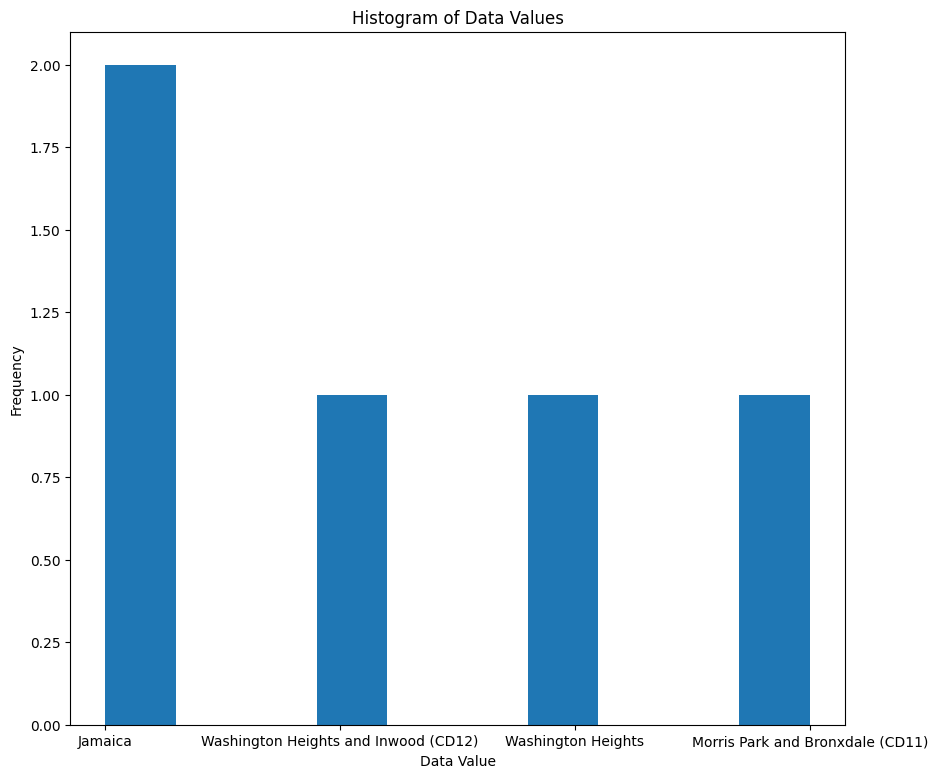

In [68]:
plt.figure(figsize=(10,9))
sample_geo = df5['Geo Place Name'].sample(n=5)
sample_data = df5['Data Value'].sample(n=100)

plt.hist(sample_geo)
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data Values')
plt.show()

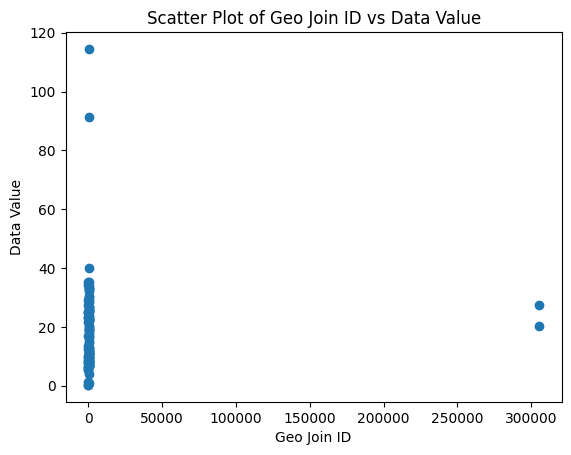

In [69]:
sample_geo_id = df5['Geo Join ID'].sample(n=100)
sample_data = df5['Data Value'].sample(n=100)

plt.scatter(x=sample_geo_id, y=sample_data)
plt.xlabel('Geo Join ID')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Geo Join ID vs Data Value')
plt.show()


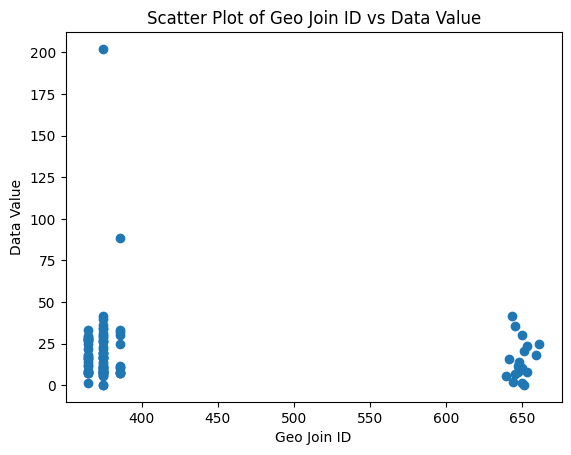

In [70]:
sample_geo_id = df5['Indicator ID'].sample(n=100)
sample_data = df5['Data Value'].sample(n=100)

plt.scatter(x=sample_geo_id, y=sample_data)
plt.xlabel('Geo Join ID')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Geo Join ID vs Data Value')
plt.show()

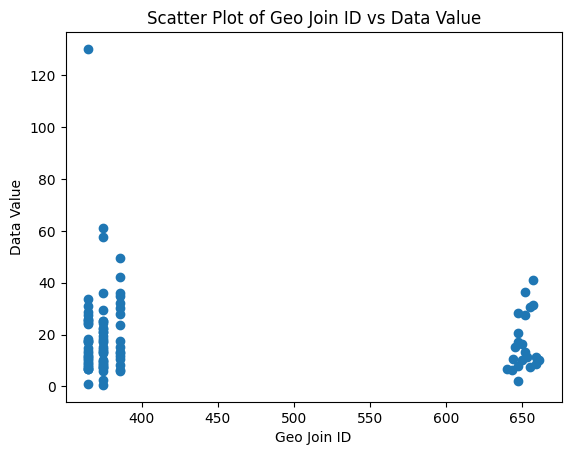

In [71]:
sample_geo_id = df5['Indicator ID'].sample(n=100)
sample_data = df5['Data Value'].sample(n=100)

plt.scatter(x=sample_geo_id, y=sample_data)
plt.xlabel('Geo Join ID')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Geo Join ID vs Data Value')
plt.show()

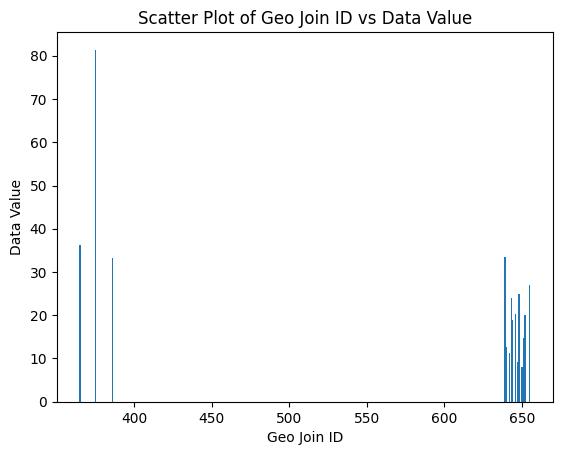

In [72]:
sample_geo_id = df5['Indicator ID'].sample(n=100)
sample_data = df5['Data Value'].sample(n=100)

plt.bar(sample_geo_id, sample_data)
plt.xlabel('Geo Join ID')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Geo Join ID vs Data Value')
plt.show()

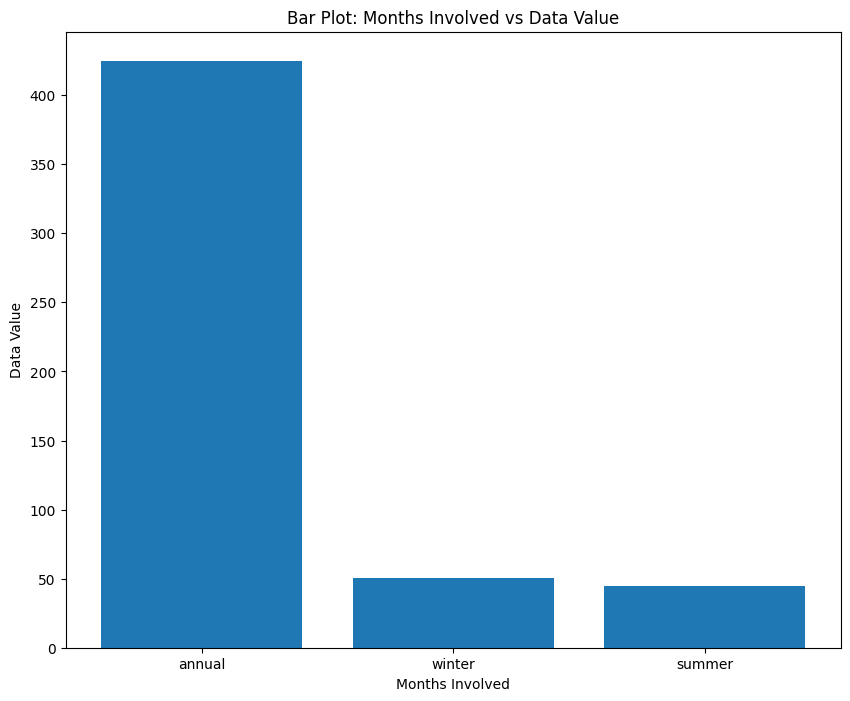

In [73]:
plt.figure(figsize=(10, 8))
plt.bar(df5['Months Involved'], df5['Data Value'])
plt.xlabel('Months Involved')
plt.ylabel('Data Value')
plt.title('Bar Plot: Months Involved vs Data Value')
plt.show()

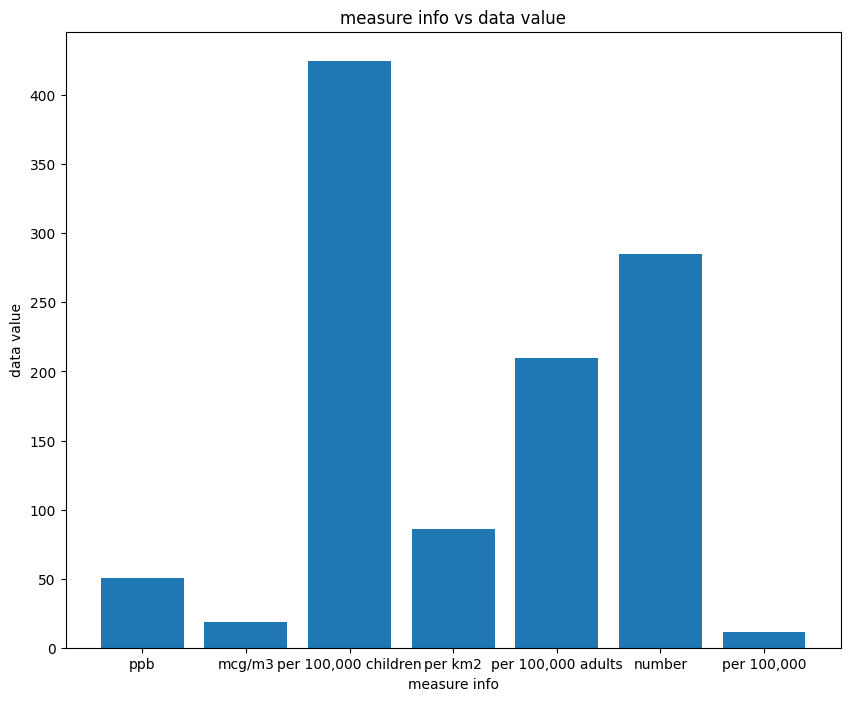

In [74]:
plt.figure(figsize=(10,8))
plt.bar(df5['Measure Info'], df5['Data Value'])
plt.xlabel('measure info')
plt.ylabel('data value')
plt.title('measure info vs data value')
plt.show()

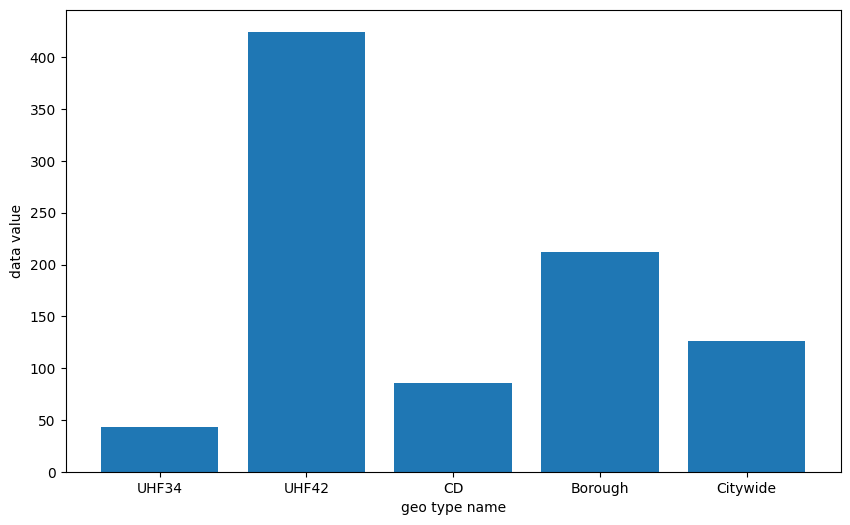

In [75]:
plt.figure(figsize=(10,6))
plt.bar(df5['Geo Type Name'], df['Data Value'])
plt.xlabel('geo type name')
plt.ylabel('data value')
plt.show()

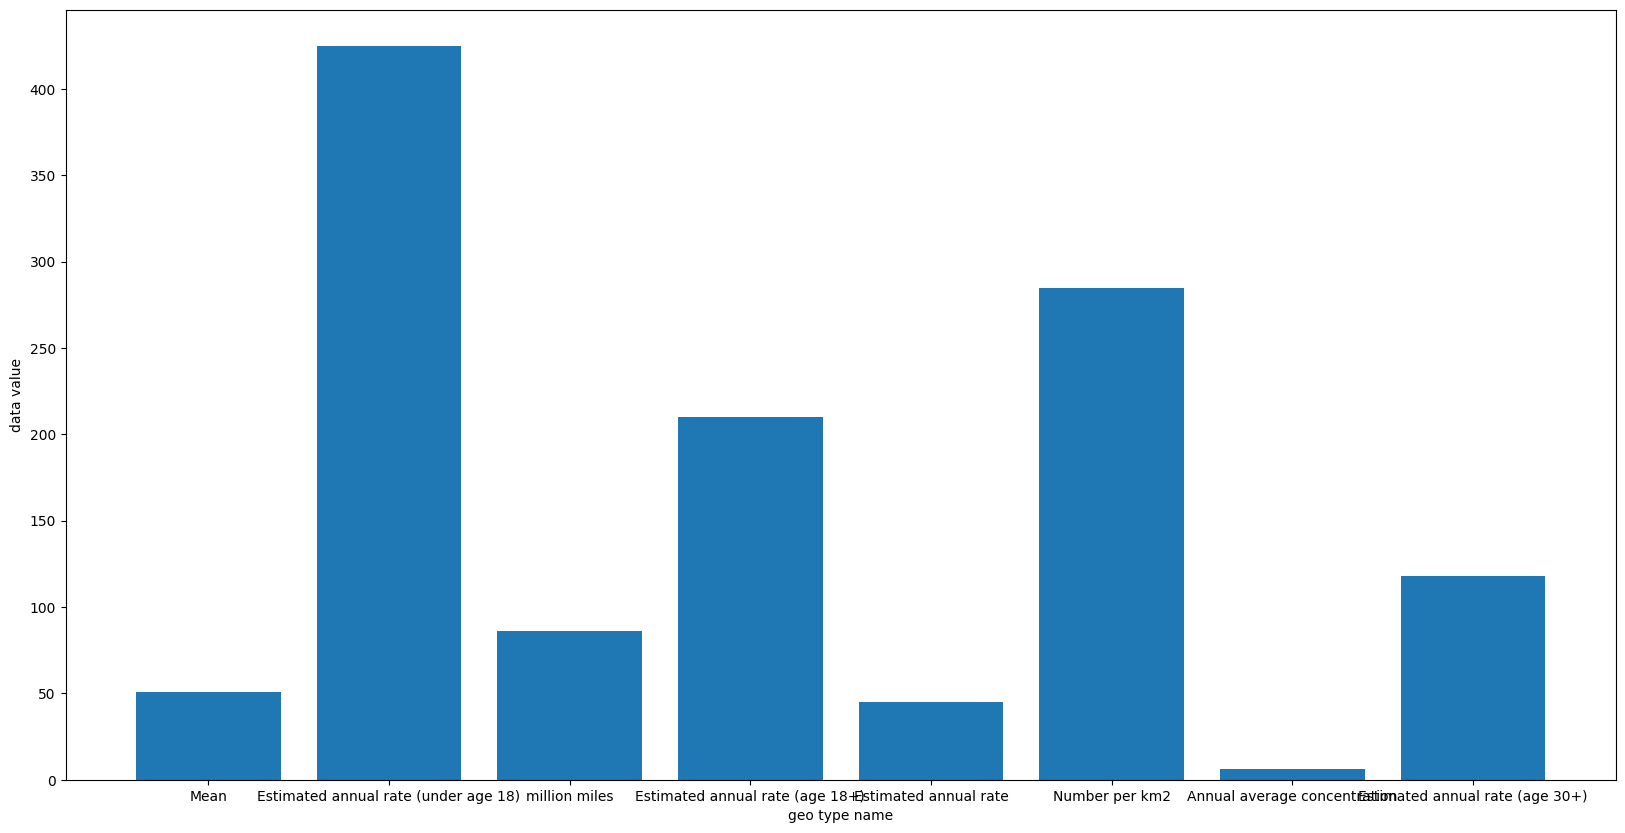

In [76]:
plt.figure(figsize=(20,10))
plt.bar(df5['Measure'], df['Data Value'])
plt.xlabel('geo type name')
plt.ylabel('data value')
plt.show()

In [77]:
df5.select_dtypes(['float','int']).columns

Index(['Indicator ID', 'Geo Join ID', 'Data Value', 'Year'], dtype='object')

In [78]:
df5.select_dtypes(['object']).columns

Index(['Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Months Involved'],
      dtype='object')

In [79]:
#Exclude the label columns
numerical_cols=['Indicator ID', 'Geo Join ID', 'Year']
categorical_cols = ['Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name','Months Involved']

In [80]:
df5[categorical_cols].head(3)

,Measure,Measure Info,Geo Type Name,Geo Place Name,Months Involved
0,Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,annual
1,Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,annual
2,Mean,ppb,UHF34,East New York,annual


In [81]:
dum_df = pd.get_dummies(df5[categorical_cols], dtype=int, dummy_na=False, drop_first=False)

In [82]:
dum_df.head(3)

,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,Measure_Number per km2,Measure_million miles,Measure Info_mcg/m3,Measure Info_number,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Let's scale the numerical values if needed

In [83]:
df5[numerical_cols].head(5)

,Indicator ID,Geo Join ID,Year
0,375,203,2010
1,375,203,2008
2,375,204,2015
3,375,103,2015
4,375,104,2008


In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [85]:
scaler = MinMaxScaler(feature_range=(0, 1))
df5[numerical_cols] = scaler.fit_transform(df5[numerical_cols])

In [86]:
df5[numerical_cols].head(3)

,Indicator ID,Geo Join ID,Year
0,0.033784,0.000002,0.3125
1,0.033784,0.000002,0.1875
2,0.033784,0.000002,0.6250


In [87]:
df5.head(3)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Months Involved,Year
0,0.033784,Mean,ppb,UHF34,0.000002,Bedford Stuyvesant - Crown Heights,25.30,annual,0.3125
1,0.033784,Mean,ppb,UHF34,0.000002,Bedford Stuyvesant - Crown Heights,26.93,annual,0.1875
2,0.033784,Mean,ppb,UHF34,0.000002,East New York,19.09,annual,0.6250


In [88]:
df5[numerical_cols].isna().sum()

Indicator ID    0
Geo Join ID     0
Year            0
dtype: int64

### all numerical is has some value so there's no null values in df4[numerical_cols]

## Let's concat encoding dataframe to main data

In [89]:
df6=df5.copy()
df6[categorical_cols].head(3)

,Measure,Measure Info,Geo Type Name,Geo Place Name,Months Involved
0,Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,annual
1,Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,annual
2,Mean,ppb,UHF34,East New York,annual


In [90]:
df6 = pd.concat([df5, dum_df], axis=1)
df6.drop(categorical_cols, axis='columns',inplace=True)

In [91]:
df6.head(3)

,Indicator ID,Geo Join ID,Data Value,Year,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
0,0.033784,0.000002,25.30,0.3125,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.033784,0.000002,26.93,0.1875,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.033784,0.000002,19.09,0.6250,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## We can use sklearn API to make onehotencoder

In [92]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder(sparse_output =False, handle_unknown='ignore').fit(df69[categorical_cols])
# encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# encoded_data = encoder.transform(df6[categorical_cols])
# encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df6.index)

# df6 = pd.concat([df6, encoded_df], axis=1)
# df6.head(5)

# Let's split test and training

In [93]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df6, test_size=0.2, random_state=42)

In [94]:
train_df.head(2)

,Indicator ID,Geo Join ID,Data Value,Year,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
15596,0.952703,0.000003,1.71,0.3750,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9736,0.000000,0.000003,8.82,0.8125,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [95]:
test_df.head(2)

,Indicator ID,Geo Join ID,Data Value,Year,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
2678,0.033784,9.609337e-07,17.16,0.375,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14249,0.070946,1.978953e-06,31.44,0.500,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### let's split the train inputs and targets

In [96]:
train_inputs = train_df.drop('Data Value',axis=1)
train_target = train_df['Data Value']
test_inputs = test_df.drop('Data Value', axis=1)
test_target = test_df['Data Value']

In [97]:
train_inputs.head(2)

,Indicator ID,Geo Join ID,Year,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,Measure_Number per km2,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
15596,0.952703,0.000003,0.3750,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9736,0.000000,0.000003,0.8125,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
test_inputs.head(2)

,Indicator ID,Geo Join ID,Year,Measure_Annual average concentration,Measure_Estimated annual rate,Measure_Estimated annual rate (age 18+),Measure_Estimated annual rate (age 30+),Measure_Estimated annual rate (under age 18),Measure_Mean,Measure_Number per km2,...,Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),Months Involved_annual,Months Involved_summer,Months Involved_winter
2678,0.033784,9.609337e-07,0.375,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14249,0.070946,1.978953e-06,0.500,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Let's make some model to predict values

In [99]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, SGDRegressor, ElasticNet
from sklearn.metrics import mean_squared_error

In [100]:
def mse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred, squared=False)

In [101]:
lr_reg = LinearRegression()
rid = Ridge()
las = Lasso()
sgdr = SGDRegressor()
eln = ElasticNet()
models=[lr_reg,rid,sgdr,eln]

In [102]:
lr_reg.fit(train_inputs,train_target)

LinearRegression()

In [103]:
preds =lr_reg.predict(train_inputs)

In [104]:
preds = np.array(preds.reshape(-1,1))

In [105]:
mse(preds,train_target)

16.38100461834815

In [106]:
def try_model(model):
        model.fit(train_inputs,train_target)
        preds_train = model.predict(train_inputs)
        preds_test = model.predict(test_inputs)
        return print("train error: : {}, test_error: {}".format(mse(train_target,preds_train),mse(test_target, preds_test)))

In [107]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)


for model in models:
    print(cross_val_score(model,train_inputs,train_target, cv=cv))
    print('\n')

[0.39727072 0.44934203 0.40196271 0.43498069 0.42735718 0.06082286
 0.39345449 0.42764768 0.43931249 0.40549125]


[0.39574017 0.44694043 0.40665575 0.44475807 0.4270011  0.40047654
 0.39249459 0.42861097 0.43861815 0.40247438]


[0.39568001 0.44168349 0.40342467 0.44274913 0.42383547 0.39739787
 0.3887239  0.42624982 0.43628156 0.40071534]


[0.12539173 0.10254625 0.10324747 0.10076216 0.10396428 0.1100003
 0.10466343 0.10739788 0.11143347 0.09532634]




#### Elastic net performs a bit good in this but still these linear models are not so good

## Let's hypertune some parameters

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [109]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
tree_models = [tree,rf]
for model in tree_models:
    print(cross_val_score(model,train_inputs,train_target,cv=cv),"\n")

[0.89446338 0.77539549 0.85646124 0.93546133 0.88490216] 

[0.91149888 0.91562554 0.86119775 0.94153918 0.91868659] 



In [110]:
def max_depth(n):
    tree = DecisionTreeRegressor(max_depth=n).fit(train_inputs,train_target)
    return mse(tree.predict(train_inputs) ,train_target), mse(tree.predict(test_inputs), test_target)

In [111]:
err = [max_depth(x) for x in range(1,32)]
err_df = pd.DataFrame(err,columns=['Train error', 'test_error'])
err_df[10:]

,Train error,test_error
10,7.007289,9.162610
11,6.203017,8.398692
12,5.607399,8.055956
13,4.877769,7.159045
14,4.251082,6.722328
15,3.923312,6.683192
16,3.629290,6.485470
17,3.381437,6.398269
18,3.171021,6.286136
19,2.973339,6.207891


In [112]:
max_depth=28

In [113]:
def try_model(model):
  model.fit(train_inputs, train_target)
  preds_t = model.predict(train_inputs)
  preds_tx = model.predict(test_inputs)
  print("train error: {}, test error: {}".format(mse(preds_t,train_target), mse(preds_tx, test_target)))

In [114]:
random_forest = RandomForestRegressor(n_estimators=30,
                criterion ='absolute_error',
                 max_depth =28,
                  n_jobs=-1,
                min_samples_leaf =20)
try_model(random_forest)

train error: 12.936672681188632, test error: 12.11930204079656


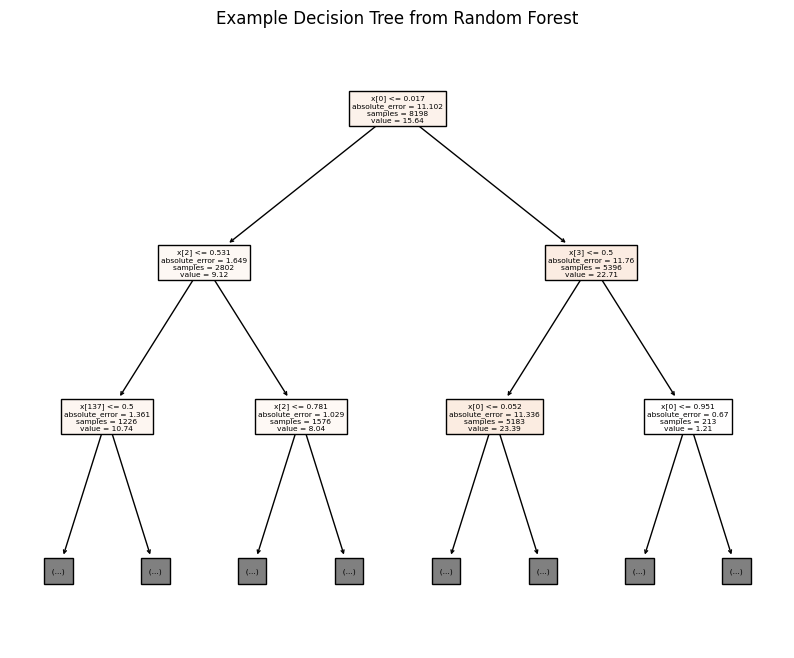

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(random_forest.estimators_[0], filled=True, max_depth=2)
plt.title("Example Decision Tree from Random Forest")
plt.show()

**We can see the random forest is better regressor than SVR this time and let's check XGBRegressor and conclude the model selection**

In [116]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=20,
                   n_jobs=-1,
                random_state=42,
                max_depth =28)

In [117]:
try_model(xgb)

train error: 0.4351141197090309, test error: 3.8585914668452492


In [118]:
scores = cross_val_score(random_forest, train_inputs, train_target, cv=5, scoring='neg_mean_absolute_error')

mae_scores = -scores

print("Mean Absolute Error (MAE) scores:", mae_scores)
print("Mean MAE:", mae_scores.mean())

Mean Absolute Error (MAE) scores: [3.72577881 4.1487316  3.67544432 4.14679743 3.84017033]
Mean MAE: 3.907384496107563


In [119]:
# !pip install graphviz
#install graphviz before showing it 
#you can visualise the xgbregressor by that code below
# from xgboost import plot_tree
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 15,15

# plot_tree(xgb, rankdir='LR')

**SO far XGBoost model is best so we will use that**

**Making a predict funtion**

In [120]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df5[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [121]:
a = max(df4['Indicator ID'])
b = max(df4['Geo Join ID'])
c = max(df4['Year'])
a,b,c

(661, 105106107, 2021)

In [122]:
def predict_func(ind_name,meas, meas_info,gtn,gji,gpn, mthinv,year):
    ind_id = indicator_names[ind_name]
    data= {'Indicator ID':ind_id, 
           'Measure':meas,
           'Measure Info':meas_info, 
           'Geo Type Name':gtn ,
           'Geo Join ID': gji, 
           'Geo Place Name': gpn,
           'Months Involved':mthinv ,
           'Year': year}
    df = pd.DataFrame([data])
    categorical_cols = ['Measure','Measure Info','Geo Type Name','Geo Place Name','Months Involved']
    numeric_cols = ['Indicator ID', 'Geo Join ID','Year']
    a = max(df4['Indicator ID'])
    b = max(df4['Geo Join ID'])
    c = max(df4['Year'])
    df['Indicator ID'] = df['Indicator ID']/a
    df['Geo Join ID'] = df['Geo Join ID']/b
    df['Year'] = df['Year']/c
    dum = pd.get_dummies(df[categorical_cols], dtype=int, dummy_na=False, drop_first=False)
    df = pd.concat([df,dum], axis=1)
    df.drop(categorical_cols,axis=1, inplace=True)
    # encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df5[categorical_cols])
    # encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
    # x = df[encoded_cols+numerical_cols]
    colt = [col for col in df.columns if col not in numerical_cols]
    dat={}
    col_name=[]
    for col,series in df6.items():
        dat[col] = 0
        if col in colt:
            dat[col] = 1
            col_name.append(col)
            print(col)
    for i in numerical_cols:
        dat[i] = df[i].iloc[0]
    x = pd.DataFrame([dat])
    x.drop('Data Value', axis=1,inplace=True)
    return xgb.predict(x)[0]

In [123]:
predict_func('Nitrogen dioxide (NO2)', 'Mean', 'ppb', 'UHF34', 203, 'Bedford Stuyvesant - Crown Heights','annual', 2009)

Measure_Mean
Measure Info_ppb
Geo Type Name_UHF34
Geo Place Name_Bedford Stuyvesant - Crown Heights
Months Involved_annual


29.339775

In [124]:
df4.head(2)

,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Months Involved,Year
0,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01,25.30,annual,2010
1,375,Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01,26.93,annual,2008


# **Let's export the model and make a predict**

In [125]:
import joblib
joblib.dump(xgb,'air_pollution_model_NY.pkl')

['air_pollution_model_NY.pkl']

In [128]:
import json
columns = {
    'data_columns' : [col.lower() for col in df5[categorical_cols].columns]
}
with open("columns.json", "w") as f:
    json.dump(columns,f)
with open("indicator_names.json", "w") as f:
    json.dump(indicator_names,f)

In [129]:
# !pip install jovian
import jovian
jovian.commit(filename='AirPollution.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrheaven1y/airpollution" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/mrheaven1y/airpollution


'https://jovian.com/mrheaven1y/airpollution'

# Done